In [1]:

!pip install pybind11>=2.12

    sys-platform (=="darwin") ; extra == 'objc'
                 ~^
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-11-13 08:53:18.973053: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-13 08:53:19.171284: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-13 08:53:20.907472: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-13 08:53:22.896144: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731468204.445594    3120 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731468204.58

In [3]:
train_dir = '/home/dhruv/Downloads/cifar-10-img/train'
test_dir = '/home/dhruv/Downloads/cifar-10-img/test'

In [4]:
img_gen = ImageDataGenerator(rescale=1.0/255)

data_gen = img_gen.flow_from_directory(
    train_dir,
    target_size=(32,32),
    batch_size=5000,
    shuffle=True,
    class_mode='categorical'
)


Found 40079 images belonging to 10 classes.


In [5]:
x_train, y_train = data_gen[0]
x_test, y_test = data_gen[2]

In [8]:
from tensorflow.keras.applications import VGG16
path = '/home/dhruv/Downloads/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'

vgg_model = VGG16(weights=path,include_top=False, input_shape=(32,32,3))

2024-11-13 08:56:12.369527: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [9]:
for layer in vgg_model.layers:
    layer.trainabler=False

In [10]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [11]:
custom_classifier = keras.Sequential([
    Flatten(input_shape=(1,1,512)),
    Dense(100, activation='relu'),
    Dropout(0.2),
    Dense(100, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
    
])

model = keras.Sequential([
    vgg_model,
    custom_classifier
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train, batch_size=100, epochs=1, validation_data=(x_test,y_test))

50/50 ━━━━━━━━━━━━━━━━━━━━ 397s 8s/step - accuracy: 0.1077 - loss: 2.4568 - val_accuracy: 0.1072 - val_loss: 2.3003


In [14]:
for layer in vgg_model.layers[:-4]:
    layer.trainable = True
    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=1000, epochs=1, validation_data=(x_test,y_test))

5/5 ━━━━━━━━━━━━━━━━━━━━ 327s 64s/step - accuracy: 0.1070 - loss: 2.4250 - val_accuracy: 0.1052 - val_loss: 2.3361


In [15]:
loss, acc = model.evaluate(x_test, y_test)
print(loss, " ", acc)

157/157 ━━━━━━━━━━━━━━━━━━━━ 79s 496ms/step - accuracy: 0.0994 - loss: 2.3408
2.3361124992370605   0.10520000010728836


In [16]:
pred = model.predict(x_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 75s 472ms/step


In [17]:
labels = list(data_gen.class_indices.keys())

/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


airplane


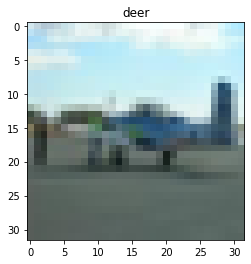

In [18]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(x_test[10])
plt.title(str(labels[np.argmax(pred[10])]))
print(str(labels[np.argmax(y_test[10])]))

In [19]:
y_test[10]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)